En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 


In [2]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

In [6]:
df_ingresos = pd.read_excel('../Data/Internet.xlsx', sheet_name='Ingresos ')


In [12]:
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023


In [8]:
# Se realiza una búsqueda de los valores faltantes
valores_faltantes = df_ingresos.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Series([], dtype: int64)

In [9]:
# Verificación de registros duplicados
duplicados = df_ingresos.duplicated().sum()
duplicados

0

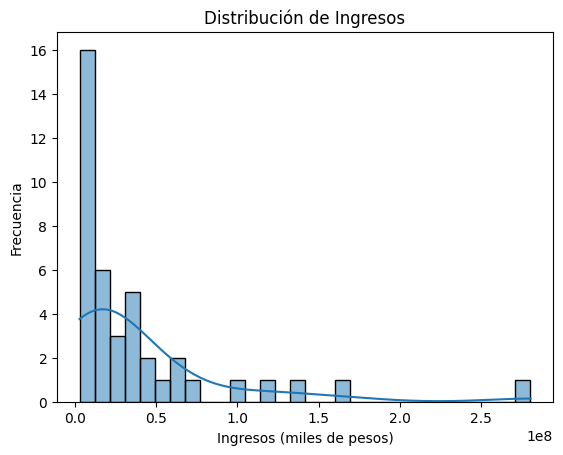

In [10]:


sns.histplot(df_ingresos['Ingresos (miles de pesos)'], bins=30, kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')
plt.show()


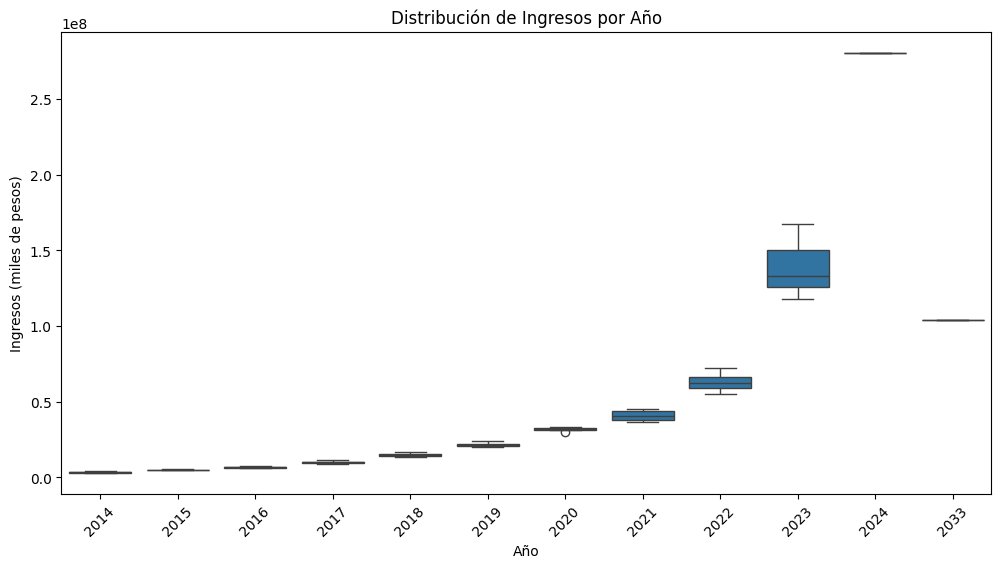

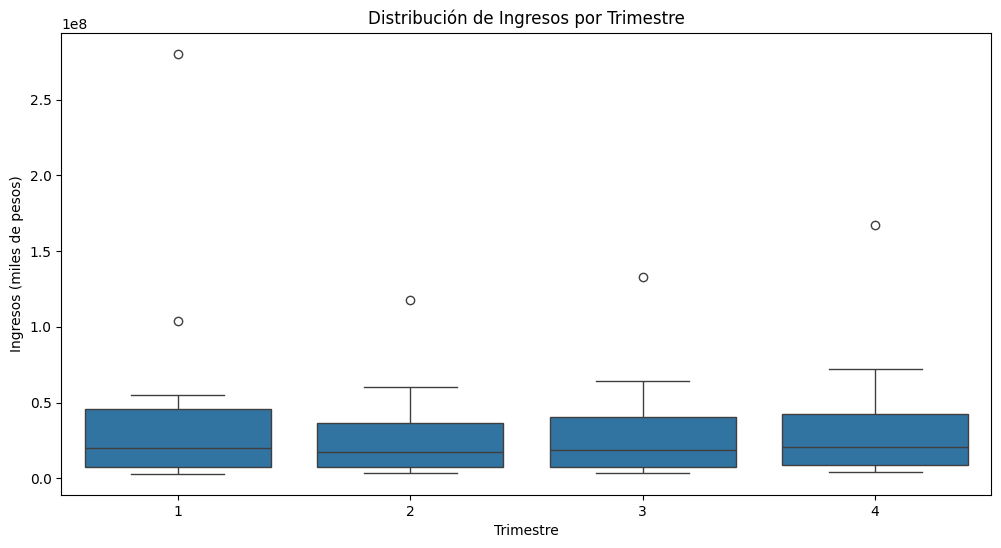

In [13]:
# Boxplot de Ingresos por Año
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Distribución de Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

# Boxplot de Ingresos por Trimestre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Trimestre', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Distribución de Ingresos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()


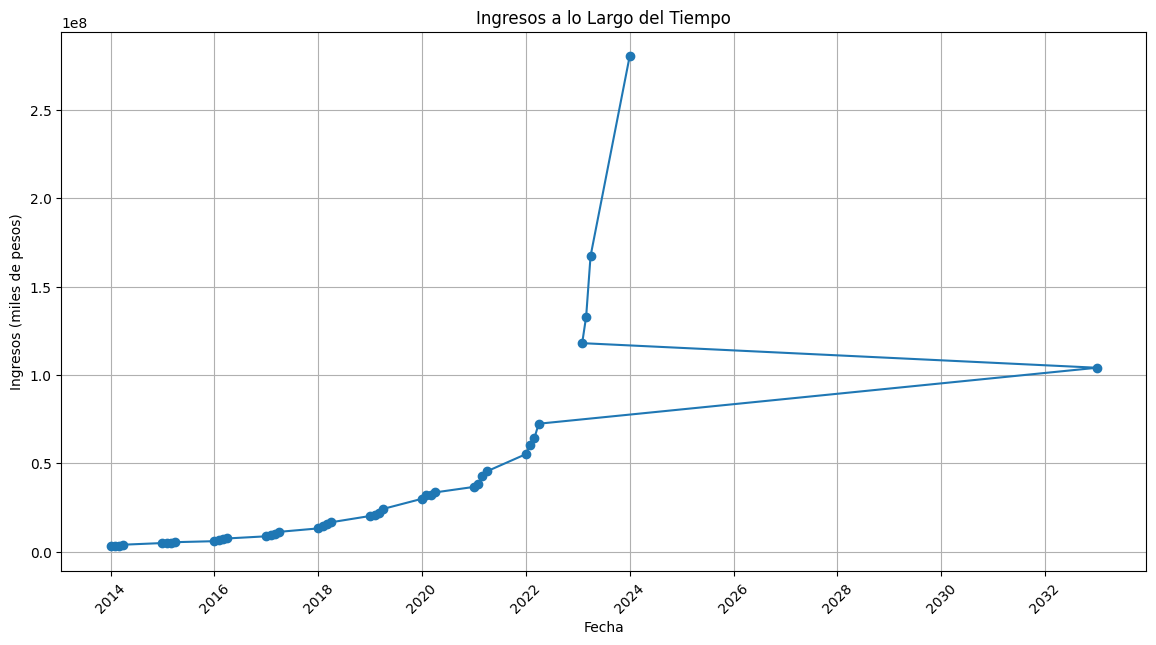

In [14]:
# Visualización de Ingresos a lo Largo del Tiempo

df_ingresos['Fecha'] = pd.to_datetime(df_ingresos['Año'].astype(str) + df_ingresos['Trimestre'].astype(str) + '1', format='%Y%m%d')
plt.figure(figsize=(14, 7))
plt.plot(df_ingresos['Fecha'], df_ingresos['Ingresos (miles de pesos)'], marker='o', linestyle='-')
plt.title('Ingresos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
